<a href="https://colab.research.google.com/github/engabduallah/teknofest-green-matter/blob/main/Stroke_Classifier_Using_MedViT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#capture
!pip install pydicom
!pip install gdcm
!pip install pylibjpeg pylibjpeg-libjpeg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 40.0 MB/s eta 0:00:00


In [3]:
!git clone https://github.com/Omid-Nejati/MedViT.git
%cd /content/MedViT

Cloning into 'MedViT'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (187/187), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 188 (delta 94), reused 134 (delta 61), pack-reused 1 (from 1)
Receiving objects: 100% (188/188), 824.16 KiB | 6.39 MiB/s, done.
Resolving deltas: 100% (94/94), done.
/content/MedViT


In [4]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.0/142.0 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.5 MB/s eta 0:00:00

In [5]:
!pip install timm
!pip install einops

In [6]:
import os
import nibabel as nib  # Library for handling NIfTI files
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score
from torch.utils.data import random_split
from torch.utils.data import Dataset
from pydicom import dcmread
import pylibjpeg
from PIL import Image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
!nvidia-smi

Tue Mar 25 06:23:48 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   28C    P0             45W /  400W |       5MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [8]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

import torchvision.utils
from torchvision import models
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torchsummary import summary

from tqdm import tqdm
import medmnist
from medmnist import INFO, Evaluator
from torch.utils.data import Dataset

import torchattacks
from torchattacks import PGD, FGSM

In [9]:

print("PyTorch", torch.__version__)
print("Torchvision", torchvision.__version__)
print("Torchattacks", torchattacks.__version__)
print("Numpy", np.__version__)
print("Medmnist", medmnist.__version__)

PyTorch 2.6.0+cu124
Torchvision 0.21.0+cu124
Torchattacks 3.5.1
Numpy 2.0.2
Medmnist 3.0.1


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
class DICOMDataset(Dataset):
    def __init__(self, stroke_folder, no_stroke_folder, hemo_stroke_folder, transform=None):
        """
        Args:
            stroke_folder (string): Path to the folder containing stroke images.
            no_stroke_folder (string): Path to the folder containing non-stroke images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.stroke_folder = stroke_folder
        self.hemo_stroke_folder = hemo_stroke_folder
        self.no_stroke_folder = no_stroke_folder
        self.transform = transform

        self.image_paths = []
        self.labels = []


        for filename in os.listdir(self.stroke_folder):
            if filename.endswith(".dcm"):
                self.image_paths.append(os.path.join(self.stroke_folder, filename))
                self.labels.append(1)  # 1 for stroke

        for filename in os.listdir(self.hemo_stroke_folder):
            if filename.endswith(".dcm"):
                self.image_paths.append(os.path.join(self.hemo_stroke_folder, filename))
                self.labels.append(1)  # 1 for stroke

        for filename in os.listdir(self.no_stroke_folder):
            if filename.endswith(".dcm"):
                self.image_paths.append(os.path.join(self.no_stroke_folder, filename))
                self.labels.append(0)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        dicom_path = self.image_paths[idx]
        dicom_data = dcmread(dicom_path)

        image = dicom_data.pixel_array

        image = image.astype(np.float32)
        image = Image.fromarray(image)

        if self.transform:
            image = self.transform(image)

        label = self.labels[idx]

        return image, label


In [14]:
def create_dataloader(stroke_folder, no_stroke_folder, hemo_stroke_folder, batch_size=32, val_split=0.2, test_split=0.1, transform=None):
    # Initialize the dataset
    dataset = DICOMDataset(stroke_folder, no_stroke_folder,hemo_stroke_folder, transform=transform)

    # Calculate split sizes
    total_size = len(dataset)
    test_size = int(test_split * total_size)
    val_size = int(val_split * total_size)
    train_size = total_size - val_size - test_size

    # Split the dataset
    train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

    # Create DataLoaders for each dataset
    cls_train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    cls_val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
    cls_test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

    return cls_train_loader, cls_val_loader, cls_test_loader

# Define the transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    #transforms.ColorJitter(brightness=0.2, contrast=0.2),
    #transforms.Normalize(mean=[.5], std=[.5])
])

# Set paths to your DICOM folders
stroke_folder = '/content/drive/MyDrive/processed tkn /output_stroke'
no_stroke_folder = '/content/drive/MyDrive/processed tkn /output_no_stroke'
hemo_stroke_folder = '/content/drive/MyDrive/processed tkn /output_hemo'

# Create DataLoaders
cls_train_loader, cls_val_loader, cls_test_loader = create_dataloader(stroke_folder, no_stroke_folder, hemo_stroke_folder, batch_size=32, val_split=0.2, test_split=0.1, transform=transform)



(224, 224, 1)


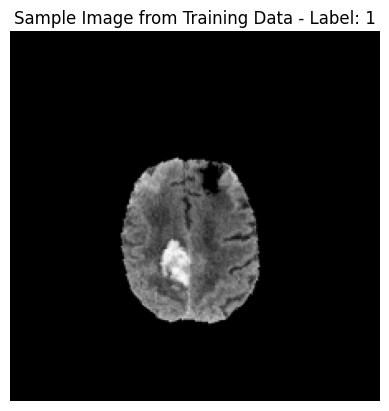

In [15]:
# Example: Fetch one sample from the training dataset and display it
for images, labels in cls_train_loader:
    # Take the first image from the batch

    image = images[0].numpy().transpose(1, 2, 0)  # Convert from CHW to HWC format for display
    print(image.shape)
    # Plot the image
    plt.imshow(image, cmap='gray')
    plt.title(f"Sample Image from Training Data - Label: {labels[0].item()}")
    plt.axis('off')  # Hide the axis
    plt.show()
    break  # Stop after plotting one image

In [16]:
import torch, gc

gc.collect()
torch.cuda.empty_cache()
torch.cuda.ipc_collect()


In [17]:
cd /content/MedViT

/content/MedViT


In [18]:
from MedViT import MedViT_small, MedViT_base, MedViT_large, ConvBNReLU

#model = MedViT_small(num_classes = 1000).cuda()
#model = MedViT_base(num_classes = n_classes).cuda()
#model = MedViT_large(pretrained=False, attn_drop=0, drop=0, head_dim=32, mix_block_ratio=0.75, num_classes = 1000).cuda()
model = MedViT_large(num_classes = 1000).cuda()

initialize_weights...


In [19]:
# Load checkpoint (adjust path to your downloaded checkpoint)
checkpoint_path = "/content/drive/MyDrive/processed tkn /MedViT_large_im1k.pth"
checkpoint = torch.load(checkpoint_path, map_location=device)

# Remove 'module.' prefix in case of DataParallel models
checkpoint = {k.replace('module.', ''): v for k, v in checkpoint['model'].items()}

model.load_state_dict(checkpoint, strict=True)

<All keys matched successfully>

In [20]:
if isinstance(model.stem[0], ConvBNReLU):
    old_conv = model.stem[0].conv  # Get the first convolutional layer

    # Create a new convolution layer with 1 input channel
    new_conv = nn.Conv2d(
        in_channels=1,  # Change from 3 to 1
        out_channels=old_conv.out_channels,
        kernel_size=old_conv.kernel_size,
        stride=old_conv.stride,
        padding=old_conv.padding,
        groups=old_conv.groups,
        bias=old_conv.bias is not None
    )

    # Initialize new weights by averaging the original 3-channel weights
    new_conv.weight = nn.Parameter(old_conv.weight.mean(dim=1, keepdim=True))

    # Replace the original convolutional layer
    model.stem[0].conv = new_conv

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [21]:
model.proj_head = nn.Sequential(
    nn.Linear(model.proj_head[0].in_features, 2)
)

In [22]:
model.proj_head[0]

Linear(in_features=1024, out_features=2, bias=True)

In [23]:
# Initialize the classification layer
nn.init.xavier_uniform_(model.proj_head[0].weight)
nn.init.zeros_(model.proj_head[0].bias)

Parameter containing:
tensor([0., 0.], requires_grad=True)

In [24]:
for name, param in model.named_parameters():
    if param.device != device:
        param.data = param.data.to(device)
        if param.grad is not None:
            param.grad = param.grad.to(device)

# Old Model - Only Vit

In [ ]:
def cls_train_model(model: nn.Module, cls_train_loader: DataLoader, cls_val_loader: DataLoader,
                epochs: int = 10, learning_rate: float = 0.005, save_path: str = 'vit_mnist.pth') -> (list, list):
    """
    Trains the model and evaluates it on the validation set after each epoch.

    Parameters:
        model (nn.Module): The neural network model to train.
        cls_train_loader (DataLoader): DataLoader for the training dataset.
        cls_val_loader (DataLoader): DataLoader for the validation dataset.
        epochs (int): The number of epochs to train the model.
        learning_rate (float): The learning rate for the optimizer.
        save_path (str): Path to save the trained model state.

    Returns:
        train_losses (tuple): A tuple containing lists of training losses per epoch.
        val_losses (tuple): A tuple containing lists of validation losses per epoch.
    """
    #optimizer = optim.AdamW(model.parameters(), lr=learning_rate, betas=[0.9, 0.999], weight_decay=0.05)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    criterion = nn.CrossEntropyLoss()
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
    #scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs, eta_min=5e-6)

    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()  # Set model to training mode
        train_loss = 0.0

        # Training loop
        for data, target in cls_train_loader:
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()  # Zero the parameter gradients
            output = model(data)  # Forward pass
            loss = criterion(output, target)  # Loss calculation
            loss.backward()  # Backward pass (backpropagation)
            optimizer.step()  # Optimize model parameters
            train_loss += loss.item()

        # Store average training loss
        train_losses.append(train_loss / len(cls_train_loader))

        # Validation loop
        val_loss = 0.0
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():
            for data, target in cls_val_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                val_loss += criterion(output, target).item()

        # Store average validation loss
        val_losses.append(val_loss / len(cls_val_loader))

        # Print epoch summary
        print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')

        scheduler.step()  # Adjust learning rate

    # Save the trained model state
    torch.save(model.state_dict(), save_path)

    # Plot training and validation losses
    plt.figure(figsize=(10, 4))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    return train_losses, val_losses


Epoch 1/50, Train Loss: 0.5993, Val Loss: 0.7107
Epoch 2/50, Train Loss: 0.3611, Val Loss: 0.4184
Epoch 3/50, Train Loss: 0.3497, Val Loss: 0.7935
Epoch 4/50, Train Loss: 0.3324, Val Loss: 0.7457
Epoch 5/50, Train Loss: 0.3073, Val Loss: 0.3339
Epoch 6/50, Train Loss: 0.2290, Val Loss: 0.2234
Epoch 7/50, Train Loss: 0.2178, Val Loss: 0.2003
Epoch 8/50, Train Loss: 0.1805, Val Loss: 0.2346
Epoch 9/50, Train Loss: 0.1685, Val Loss: 0.1982
Epoch 10/50, Train Loss: 0.1802, Val Loss: 0.2032
Epoch 11/50, Train Loss: 0.1557, Val Loss: 0.1855
Epoch 12/50, Train Loss: 0.1483, Val Loss: 0.1846
Epoch 13/50, Train Loss: 0.1467, Val Loss: 0.1808
Epoch 14/50, Train Loss: 0.1436, Val Loss: 0.1872
Epoch 15/50, Train Loss: 0.1319, Val Loss: 0.1969
Epoch 16/50, Train Loss: 0.1304, Val Loss: 0.1884
Epoch 17/50, Train Loss: 0.1264, Val Loss: 0.1916
Epoch 18/50, Train Loss: 0.1296, Val Loss: 0.1958
Epoch 19/50, Train Loss: 0.1292, Val Loss: 0.1910
Epoch 20/50, Train Loss: 0.1265, Val Loss: 0.1918
Epoch 21/

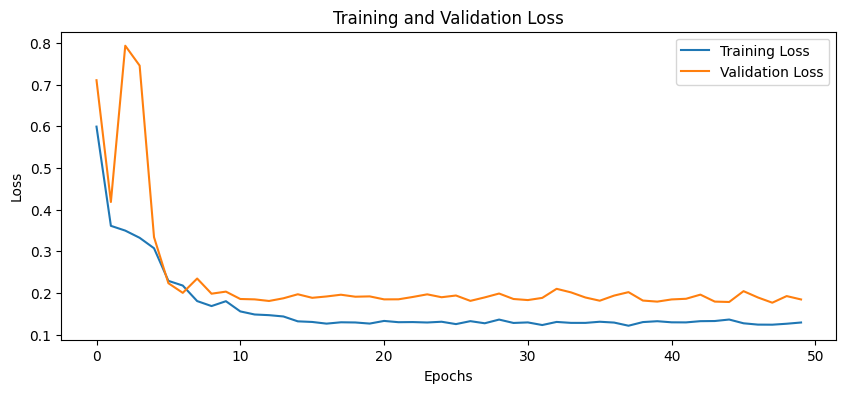

([0.5992694786966664,
  0.3611256151574932,
  0.3496600306809765,
  0.33237677062415094,
  0.3073191196747022,
  0.22904446251588326,
  0.21775319230781026,
  0.18051715141596042,
  0.16853474453091621,
  0.1802046960219741,
  0.15570872611276906,
  0.14829613880751885,
  0.14669980481904868,
  0.14356574546290587,
  0.13187492733234413,
  0.13038703169010274,
  0.12636259648540657,
  0.1296007463274753,
  0.12915146080394313,
  0.12650145383628264,
  0.13287199536108807,
  0.1298062750840024,
  0.13010348135937158,
  0.12909891555876765,
  0.13091198553981848,
  0.12524075001120977,
  0.13232109773495834,
  0.12723415342401967,
  0.13609505449868228,
  0.12799869035051703,
  0.1292904459118639,
  0.12300289399309518,
  0.13044695918486543,
  0.1281797410537527,
  0.12815136550479148,
  0.13089425980483424,
  0.1289114082193844,
  0.12135139703495454,
  0.1300968171850051,
  0.13217020393285442,
  0.12952512996398832,
  0.1293410699725253,
  0.1322741283563106,
  0.13263469442010742,
 

In [ ]:
cls_train_model(model, cls_train_loader, cls_val_loader, epochs=50, learning_rate=0.001)

In [ ]:
images, labels = next(iter(cls_train_loader))
# Getting the size of the first image in the batch
get_image_size = images[0].size()
print(get_image_size)
# Getting the number of classes
unique_labels = set()
for _, labels in cls_train_loader:
    unique_labels.update(labels.tolist())

get_num_classes = len(unique_labels)
print(get_num_classes)

In [ ]:
from torchsummary import summary
summary(model, input_size=(get_image_size[0], get_image_size[1], get_image_size[2]))

In [ ]:
def cls_test_model(model: nn.Module, cls_test_loader: DataLoader, load_path: str = 'vit_mnist.pth') -> None:
    """
    Evaluates the model on the test dataset.

    Parameters:
        model (nn.Module): The neural network model to be evaluated.
        cls_test_loader (DataLoader): DataLoader for the test dataset.
        load_path (str): Path to the file from which the model state is loaded.
    """
    # Load the saved model state
    model.load_state_dict(torch.load(load_path, map_location=device))  # Ensure model loads to the correct device
    model.eval()  # Set the model to evaluation mode

    test_loss = 0
    correct = 0
    all_preds = []
    all_targets = []
    criterion = nn.CrossEntropyLoss()

    with torch.no_grad():  # No gradient calculation for inference
        for data, target in cls_test_loader:
            # Move data and target to the same device as the model
            data, target = data.to(device), target.to(device)

            # Forward pass and loss calculation
            output = model(data)
            test_loss += criterion(output, target).item()

            # Prediction and accuracy calculation
            pred = output.argmax(dim=1, keepdim=False)  # `pred` will have the same batch size as `target`
            correct += pred.eq(target).sum().item()

            # Storing all predictions and targets for F1 score calculation
            all_preds.extend(pred.cpu().tolist())  # Convert to list and extend
            all_targets.extend(target.cpu().tolist())  # Convert to list and extend

    # Calculate average test loss and accuracy
    test_loss /= len(cls_test_loader)
    accuracy = correct / len(cls_test_loader.dataset)

    # Calculate F1 score
    f1 = f1_score(all_targets, all_preds, average='weighted')

    # Print results
    print(f'\n\n Test set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(cls_test_loader.dataset)} ({accuracy:.2%}), F1 Score: {f1:.4f}')


In [ ]:
cls_test_model(model, cls_test_loader)



 Test set: Average loss: 0.2289, Accuracy: 618/665 (92.93%), F1 Score: 0.9283



#Integrated Model: Segmentation + Classification


In [25]:
import kagglehub
import os
current_dir = os.getcwd()

# Download latest version
DATASET_PATH = kagglehub.dataset_download("orvile/inme-veri-seti-stroke-dataset")


print("Path to dataset files:", DATASET_PATH)

class StrokeDataset(Dataset):
    def __init__(self, images_dir, masks_dir, image_size=(256, 256)):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.image_files = sorted(os.listdir(images_dir))
        self.mask_files = sorted(os.listdir(masks_dir))
        self.image_size = image_size

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.images_dir, self.image_files[idx])
        mask_path = os.path.join(self.masks_dir, self.mask_files[idx])

        image = Image.open(img_path).convert("L").resize(self.image_size)
        mask = Image.open(mask_path).convert("L").resize(self.image_size)

        image = np.array(image, dtype=np.float32) / 255.0
        mask = np.array(mask, dtype=np.float32) / 255.0

        image = np.expand_dims(image, axis=0)
        mask = np.expand_dims(mask, axis=0)

        image = torch.tensor(image, dtype=torch.float32)
        mask = torch.tensor(mask, dtype=torch.float32)
        return image, mask

# Paths for the dataset
base_path = f"{DATASET_PATH}/İNME VERİ SETİ/YarısmaVeriSeti_1_Oturum"
png_path = os.path.join(base_path, "PNG")
masks_path = os.path.join(base_path, "MASKS")

# Create full dataset
full_dataset = StrokeDataset(png_path, masks_path, image_size=(256,256))
dataset_size = len(full_dataset)

# Split dataset: 70% train, 15% val, 15% test (adjustable split)
train_size = int(0.7 * dataset_size)
val_size = int(0.15 * dataset_size)
test_size = dataset_size - train_size - val_size

seg_train_dataset, seg_val_dataset, seg_test_dataset = random_split(full_dataset, [train_size, val_size, test_size])
print(f"Total samples: {dataset_size}, Train: {train_size}, Val: {val_size}, Test: {test_size}")

# Create DataLoaders
batch_size = 8
seg_train_loader = DataLoader(seg_train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
seg_val_loader = DataLoader(seg_val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
seg_test_loader = DataLoader(seg_test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

print(f"Train batches: {len(seg_train_loader)}, Val batches: {len(seg_val_loader)}, Test batches: {len(seg_test_loader)}")


100%|██████████| 991M/991M [00:06<00:00, 151MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/orvile/inme-veri-seti-stroke-dataset/versions/1
Total samples: 200, Train: 140, Val: 30, Test: 30
Train batches: 18, Val batches: 4, Test batches: 4


In [26]:
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels, use_bn=False, norm_layer=nn.BatchNorm2d):
        super(DoubleConv, self).__init__()
        layers = []
        layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
        if use_bn:
            layers.append(norm_layer(out_channels))
        layers.append(nn.ReLU(inplace=True))
        layers.append(nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1))
        if use_bn:
            layers.append(norm_layer(out_channels))
        layers.append(nn.ReLU(inplace=True))
        self.double_conv = nn.Sequential(*layers)

    def forward(self, x):
        return self.double_conv(x)

class MultiHeadAttentionBlock(nn.Module):
    def __init__(self, embed_dim, num_heads=4):
        """
        Applies multi-head self-attention over a flattened spatial feature map.
        """
        super(MultiHeadAttentionBlock, self).__init__()
        self.mha = nn.MultiheadAttention(embed_dim, num_heads)
        self.norm = nn.LayerNorm(embed_dim)

    def forward(self, x):
        # x: (batch, seq_len, embed_dim)
        attn_output, _ = self.mha(x, x, x)
        x = self.norm(x + attn_output)
        return x

class UNet(nn.Module):
    def __init__(self, in_channels=1, out_channels=1, use_attention=False, use_bn=False, norm_layer=nn.BatchNorm2d):
        super(UNet, self).__init__()
        self.use_attention = use_attention

        # Encoder path
        self.inc = DoubleConv(in_channels, 64, use_bn=use_bn, norm_layer=norm_layer)
        self.down1 = nn.Sequential(nn.MaxPool2d(2), DoubleConv(64, 128, use_bn=use_bn, norm_layer=norm_layer))
        self.down2 = nn.Sequential(nn.MaxPool2d(2), DoubleConv(128, 256, use_bn=use_bn, norm_layer=norm_layer))

        # Bridge (bottleneck)
        self.bridge = DoubleConv(256, 256, use_bn=use_bn, norm_layer=norm_layer)
        if self.use_attention:
            # We will apply attention on the bridge features.
            self.attention = MultiHeadAttentionBlock(embed_dim=256, num_heads=4)

        # Decoder path
        self.up1 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.conv_up1 = DoubleConv(256+128, 128, use_bn=use_bn, norm_layer=norm_layer)
        self.up2 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.conv_up2 = DoubleConv(128+64, 64, use_bn=use_bn, norm_layer=norm_layer)

        self.outc = nn.Conv2d(64, out_channels, kernel_size=1)

    def forward(self, x):
        # Encoder
        x1 = self.inc(x)      # [B, 64, H, W]
        x2 = self.down1(x1)   # [B, 128, H/2, W/2]
        x3 = self.down2(x2)   # [B, 256, H/4, W/4]

        # Bridge
        x_bridge = self.bridge(x3)  # [B, 256, H/4, W/4]
        if self.use_attention:
            b, c, h, w = x_bridge.size()
            # Flatten spatial dimensions: shape -> (B, H*W, C)
            x_flat = x_bridge.view(b, c, -1).permute(0, 2, 1)
            x_att = self.attention(x_flat)
            x_bridge = x_att.permute(0, 2, 1).view(b, c, h, w)

        # Decoder
        x = self.up1(x_bridge)  # Upsample -> shape: [B, 256, H/2, W/2]
        x = torch.cat([x, x2], dim=1)  # Concatenate skip connection
        x = self.conv_up1(x)
        x = self.up2(x)
        x = torch.cat([x, x1], dim=1)
        x = self.conv_up2(x)
        x = self.outc(x)
        return x


In [27]:
def seg_train_model(model, train_loader, val_loader, num_epochs=5, learning_rate=0.001, device=device):
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.BCEWithLogitsLoss()  # For binary segmentation
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, masks in train_loader:
            images, masks = images.to(device), masks.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, masks)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * images.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)

        # Validation
        model.eval()
        running_val_loss = 0.0
        with torch.no_grad():
            for images, masks in val_loader:
                images, masks = images.to(device), masks.to(device)
                outputs = model(images)
                loss = criterion(outputs, masks)
                running_val_loss += loss.item() * images.size(0)
        val_epoch_loss = running_val_loss / len(val_loader.dataset)
        val_losses.append(val_epoch_loss)
        print(f"Epoch {epoch+1}/{num_epochs}: Train Loss: {epoch_loss:.4f}, Val Loss: {val_epoch_loss:.4f}")
    return train_losses, val_losses

def seg_evaluate_model(model, dataloader, device=device):
    model.eval()
    total_pixels = 0
    correct_pixels = 0
    with torch.no_grad():
        for images, masks in dataloader:
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)
            # Apply sigmoid and threshold at 0.5
            preds = torch.sigmoid(outputs)
            preds = (preds > 0.5).float()
            correct_pixels += (preds == masks).sum().item()
            total_pixels += masks.numel()
    accuracy = correct_pixels / total_pixels
    return accuracy

def plot_training_history(train_losses, val_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label="Training Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()
    plt.show()

In [28]:
def seg_run_experiment(use_attention=False, use_abnn=False, num_epochs=5, save_path='unet.pth'):
    if use_abnn:
        # norm_layer = AdaptiveBatchNorm  # Our custom adaptive norm layer (ABNN)
        model_variant = "U-Net with ABNN"
    else:
        norm_layer = nn.BatchNorm2d  # Standard BN
        model_variant = "Standard U-Net"

    # For this segmentation task we use one input channel and one output channel.
    # Set use_bn=True to enable normalization layers.
    model = UNet(in_channels=1, out_channels=1, use_attention=use_attention, use_bn=True, norm_layer=norm_layer)
    model.to(device)
    print(f"Training {model_variant} {'with Attention' if use_attention else ''}...")

    train_losses, val_losses = seg_train_model(model, seg_train_loader, seg_val_loader, num_epochs=num_epochs, learning_rate=0.001, device=device)
    torch.save(model.state_dict(), save_path)

    val_acc = seg_evaluate_model(model, seg_test_loader, device=device)
    print(f"{model_variant} Test Pixel Accuracy: {val_acc*100:.2f}%")

    plot_training_history(train_losses, val_losses)
    return model

Training Standard U-Net ...
Epoch 1/5: Train Loss: 0.3570, Val Loss: 0.1701
Epoch 2/5: Train Loss: 0.1792, Val Loss: 0.5210
Epoch 3/5: Train Loss: 0.1173, Val Loss: 0.1208
Epoch 4/5: Train Loss: 0.0853, Val Loss: 0.0728
Epoch 5/5: Train Loss: 0.0636, Val Loss: 0.0611
Standard U-Net Test Pixel Accuracy: 99.70%


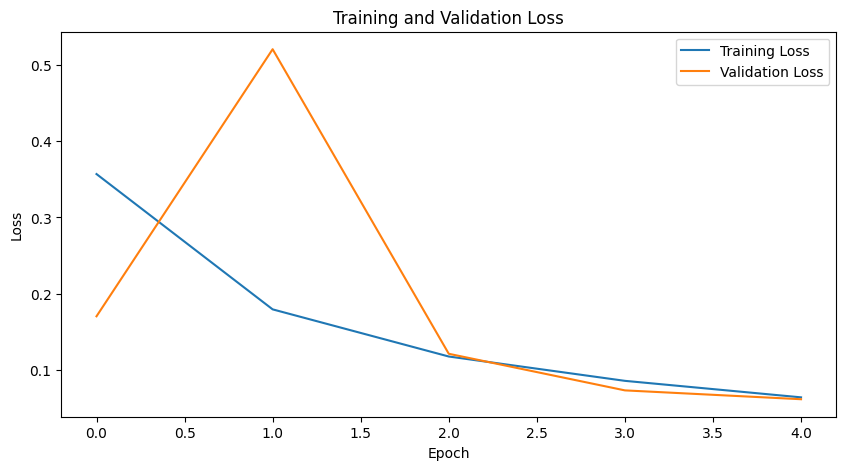

Training Standard U-Net with Attention...
Epoch 1/5: Train Loss: 0.3236, Val Loss: 0.3517
Epoch 2/5: Train Loss: 0.1652, Val Loss: 0.1627
Epoch 3/5: Train Loss: 0.1059, Val Loss: 0.0971
Epoch 4/5: Train Loss: 0.0758, Val Loss: 0.0869
Epoch 5/5: Train Loss: 0.0580, Val Loss: 0.0552
Standard U-Net Test Pixel Accuracy: 99.70%


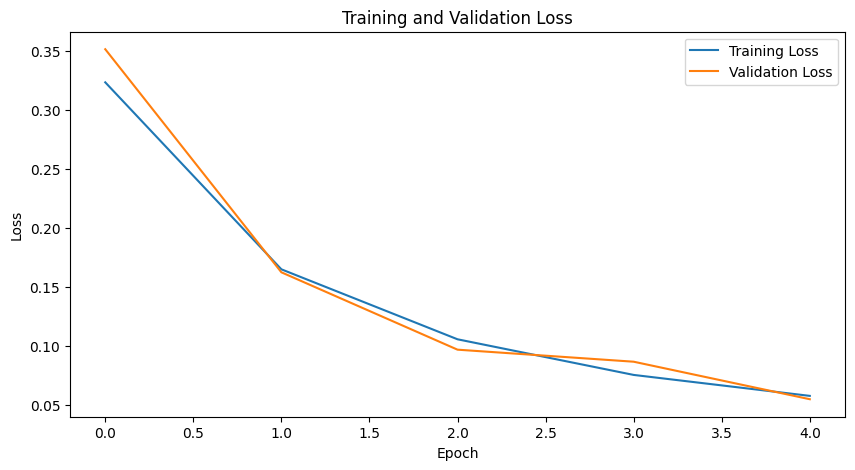

In [25]:
# Experiment 1: Standard U-Net (without attention)
model_standard = seg_run_experiment(use_attention=False, use_abnn=False, num_epochs=5, save_path='../unet_standard.pth')

# Experiment 2: U-Net with Multi-Head Attention
model_attention = seg_run_experiment(use_attention=True, use_abnn=False, num_epochs=5, save_path='../unet_attention.pth')


In [29]:
class IntegratedModel(nn.Module):
    def __init__(self, unet, classifier):
        super(IntegratedModel, self).__init__()
        self.unet = unet
        self.classifier = classifier

        # Freeze the segmentation branch
        for param in self.unet.parameters():
            param.requires_grad = False

    def forward(self, x):
        # Get segmentation logits from U-Net
        mask_logits = self.unet(x)  # [B, 1, H, W]
        mask = torch.sigmoid(mask_logits).detach() # Convert to probability mask

        # Multiply the original image with the mask to emphasize ROI
        x_masked = x * mask

        # Get classification logits from the classifier (MedViT)
        out = self.classifier(x_masked)  # expected shape: [B, 2]
        return out, mask_logits

# Initialize U-Net for segmentation
unet_seg = UNet(in_channels=1, out_channels=1, use_attention=False, use_bn=True)

# Optionally load pre-trained U-Net weights
unet_seg.load_state_dict(torch.load('/content/unet_standard.pth', map_location=device))

# Create the integrated model
integrated_model = IntegratedModel(unet_seg, model).to(device)

print(integrated_model)

IntegratedModel(
  (unet): UNet(
    (inc): DoubleConv(
      (double_conv): Sequential(
        (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (down1): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (double_conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (4): BatchNorm2d

In [30]:
def train_integrated_model(model: nn.Module, train_loader: DataLoader, val_loader: DataLoader,
                           epochs: int = 20, learning_rate: float = 0.0005, save_path: str = 'integrated_model.pth'):
    model.to(device)
    optimizer = optim.Adam(model.classifier.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)  # Reduce LR
    criterion = nn.CrossEntropyLoss()

    train_losses, val_losses = [], []
    best_val_loss = float('inf')
    early_stopping_patience = 4
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs, _ = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * images.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs, _ = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * images.size(0)

        val_epoch_loss = val_loss / len(val_loader.dataset)
        val_losses.append(val_epoch_loss)

        print(f"Epoch {epoch+1}/{epochs}: Train Loss: {epoch_loss:.4f}, Val Loss: {val_epoch_loss:.4f}")

        # Early stopping
        if val_epoch_loss < best_val_loss:
            best_val_loss = val_epoch_loss
            patience_counter = 0
            torch.save(model.state_dict(), save_path)
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print("Early stopping triggered.")
                break

        scheduler.step()

    return train_losses, val_losses


In [31]:
def evaluate_integrated_model(model: nn.Module, dataloader: DataLoader):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    criterion = nn.CrossEntropyLoss()
    total_loss = 0.0
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs, _ = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * images.size(0)
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            all_preds.extend(preds.cpu().tolist())
            all_labels.extend(labels.cpu().tolist())
    accuracy = correct / total
    avg_loss = total_loss / total
    print(f"Test Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2%}")
    return accuracy

def visualize_integrated_predictions(model: nn.Module, dataloader: DataLoader, num_samples=5):
    model.eval()
    images_list, labels_list, preds_list, masks_list = [], [], [], []
    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            outputs, mask_logits = model(images)
            preds = outputs.argmax(dim=1)
            images_list.append(images.cpu())
            labels_list.append(labels.cpu())
            preds_list.append(preds.cpu())
            masks_list.append(torch.sigmoid(mask_logits).cpu())
            if len(images_list) * images.size(0) >= num_samples:
                break
    images_cat = torch.cat(images_list, dim=0)[:num_samples]
    preds_cat = torch.cat(preds_list, dim=0)[:num_samples]
    masks_cat = torch.cat(masks_list, dim=0)[:num_samples]

    plt.figure(figsize=(12, num_samples * 3))
    for i in range(num_samples):
        plt.subplot(num_samples, 3, i*3 + 1)
        plt.imshow(images_cat[i].squeeze(), cmap='gray')
        plt.title(f"Original Image")
        plt.axis('off')

        plt.subplot(num_samples, 3, i*3 + 2)
        plt.imshow(masks_cat[i].squeeze(), cmap='gray')
        plt.title("Predicted Mask")
        plt.axis('off')

        plt.subplot(num_samples, 3, i*3 + 3)
        plt.imshow(preds_cat[i].squeeze(), cmap='gray')
        plt.title("Predicted Class")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


Epoch 1/10: Train Loss: 0.5407, Val Loss: 0.5246
Epoch 2/10: Train Loss: 0.3574, Val Loss: 0.3208
Epoch 3/10: Train Loss: 0.3051, Val Loss: 0.7274
Epoch 4/10: Train Loss: 0.2976, Val Loss: 0.6264
Epoch 5/10: Train Loss: 0.2750, Val Loss: 0.2956
Epoch 6/10: Train Loss: 0.2203, Val Loss: 0.3371
Epoch 7/10: Train Loss: 0.1807, Val Loss: 0.2220
Epoch 8/10: Train Loss: 0.1919, Val Loss: 0.2593
Epoch 9/10: Train Loss: 0.1964, Val Loss: 0.2127
Epoch 10/10: Train Loss: 0.1687, Val Loss: 0.2298


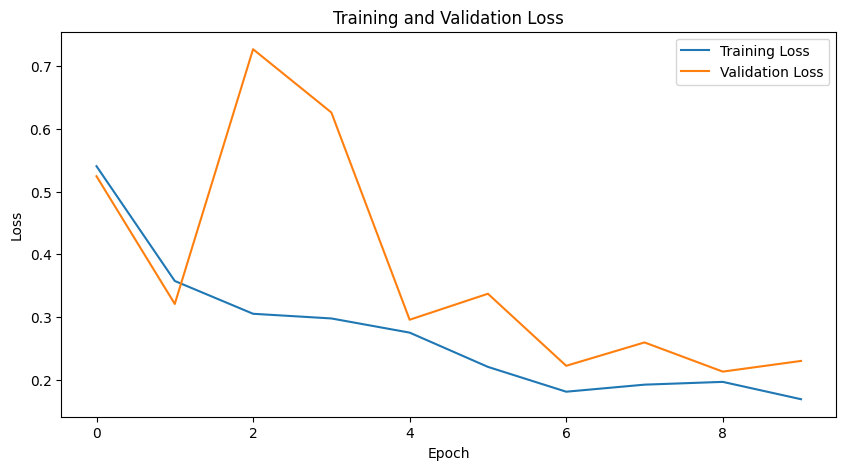

In [32]:
train_losses, val_losses = train_integrated_model(integrated_model, cls_train_loader, cls_val_loader, epochs=10, learning_rate=0.0005, save_path='integrated_model.pth')
plot_training_history(train_losses, val_losses)

Epoch 1/20: Train Loss: 0.5715, Val Loss: 1.3701
Epoch 2/20: Train Loss: 0.3576, Val Loss: 0.2810
Epoch 3/20: Train Loss: 0.3326, Val Loss: 0.2994
Epoch 4/20: Train Loss: 0.3365, Val Loss: 0.3939
Epoch 5/20: Train Loss: 0.3059, Val Loss: 0.2902
Epoch 6/20: Train Loss: 0.2718, Val Loss: 0.4862
Epoch 7/20: Train Loss: 0.2792, Val Loss: 0.3471
Epoch 8/20: Train Loss: 0.2669, Val Loss: 0.4731
Epoch 9/20: Train Loss: 0.2811, Val Loss: 0.2898
Epoch 10/20: Train Loss: 0.2787, Val Loss: 0.4050
Epoch 11/20: Train Loss: 0.2616, Val Loss: 0.3808
Epoch 12/20: Train Loss: 0.2697, Val Loss: 0.2851
Epoch 13/20: Train Loss: 0.2550, Val Loss: 0.3127
Epoch 14/20: Train Loss: 0.2623, Val Loss: 0.2491
Epoch 15/20: Train Loss: 0.2819, Val Loss: 0.2852
Epoch 16/20: Train Loss: 0.2710, Val Loss: 0.2922
Epoch 17/20: Train Loss: 0.2730, Val Loss: 0.6942
Epoch 18/20: Train Loss: 0.7112, Val Loss: 0.6418
Epoch 19/20: Train Loss: 0.7269, Val Loss: 0.7300
Epoch 20/20: Train Loss: 0.6796, Val Loss: 0.6403


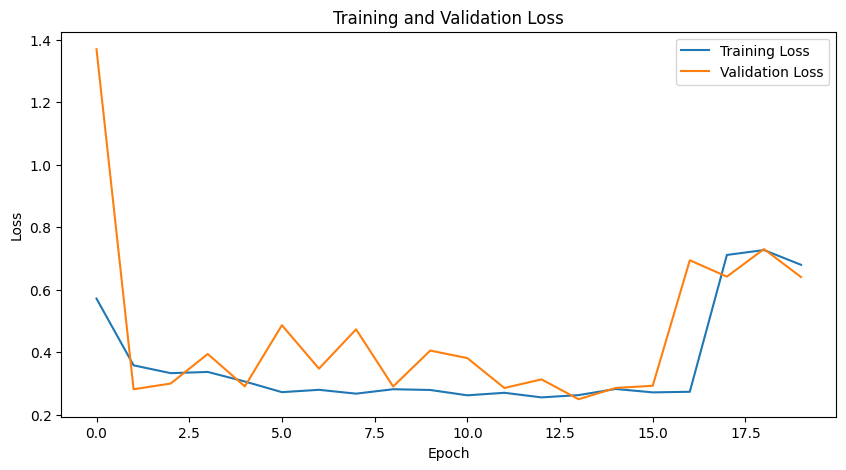

In [35]:
train_losses, val_losses = train_integrated_model(integrated_model, cls_train_loader, cls_val_loader, epochs=20, learning_rate=0.001, save_path='integrated_model.pth')
plot_training_history(train_losses, val_losses)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

def evaluate_integrated_model(model: nn.Module, dataloader: DataLoader):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    criterion = nn.CrossEntropyLoss()
    total_loss = 0.0

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs, _ = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * images.size(0)
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            all_preds.extend(preds.cpu().tolist())
            all_labels.extend(labels.cpu().tolist())

    # Core Metrics
    accuracy = correct / total
    avg_loss = total_loss / total

    # Sklearn Metrics
    f1 = f1_score(all_labels, all_preds, average='weighted')  # or 'macro', 'micro'
    report = classification_report(all_labels, all_preds, digits=4)
    cm = confusion_matrix(all_labels, all_preds)

    # Print all results
    print(f"\nTest Loss: {avg_loss:.4f}")
    print(f"Accuracy: {accuracy:.2%}")
    print(f"F1 Score (weighted): {f1:.4f}")
    print("\nClassification Report:\n", report)
    print("Confusion Matrix:\n", cm)

    return accuracy, f1, report, cm

In [37]:
accuracy = evaluate_integrated_model(integrated_model, cls_test_loader)
# visualize_integrated_predictions(integrated_model, cls_val_loader, num_samples=5)


Test Loss: 0.2481
Accuracy: 90.68%
F1 Score (weighted): 0.9066

Classification Report:
               precision    recall  f1-score   support

           0     0.9234    0.9321    0.9277       427
           1     0.8761    0.8613    0.8686       238

    accuracy                         0.9068       665
   macro avg     0.8998    0.8967    0.8982       665
weighted avg     0.9065    0.9068    0.9066       665

Confusion Matrix:
 [[398  29]
 [ 33 205]]


In [49]:
import torchvision.transforms.functional as TF

# ---------------------------
# 1. ROI Cropping Functions
# ---------------------------

def crop_roi_single(image, mask, threshold=0.5, output_size=(224,224)):
    """
    Crop a single image using its mask.
    image: Tensor [C, H, W]
    mask: Tensor [1, H, W]
    Returns a resized crop of the ROI or the resized full image if no ROI is found.
    """
    mask_bin = mask > threshold
    coords = torch.nonzero(mask_bin[0], as_tuple=False)
    if coords.shape[0] == 0:
        return TF.resize(image, output_size)
    y_min = torch.min(coords[:, 0])
    y_max = torch.max(coords[:, 0])
    x_min = torch.min(coords[:, 1])
    x_max = torch.max(coords[:, 1])
    cropped = image[:, y_min:y_max+1, x_min:x_max+1]
    cropped_resized = TF.resize(cropped, output_size)
    return cropped_resized

def crop_roi_batch(x, mask, threshold=0.5, output_size=(224,224)):
    """
    Apply crop_roi_single for each image in the batch.
    x: [B, C, H, W]
    mask: [B, 1, H, W]
    """
    roi_list = []
    B = x.size(0)
    for i in range(B):
        roi = crop_roi_single(x[i], mask[i], threshold, output_size)
        roi_list.append(roi.unsqueeze(0))
    return torch.cat(roi_list, dim=0)


In [39]:
# ---------------------------
# 2. Classifier Definitions
# ---------------------------

# Simple CNN-based classifier with dropout regularization
class SimpleCNNClassifier(nn.Module):
    def __init__(self, input_size=(224,224), num_classes=2, dropout_rate=0.5):
        super(SimpleCNNClassifier, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # 112x112
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # 56x56
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)   # 28x28
        )
        self.flattened_size = 128 * (input_size[0]//8) * (input_size[1]//8)
        self.classifier = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(self.flattened_size, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout_rate),
            nn.Linear(256, num_classes)
        )
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [46]:
class IntegratedModel(nn.Module):
    def __init__(self, unet, classifier_vit, classifier_cnn, use_crop=True, crop_threshold=0.5, crop_output_size=(224,224)):
        super(IntegratedModel, self).__init__()
        self.unet = unet
        # self.classifier_vit = classifier_vit
        # self.classifier_cnn = classifier_cnn
        self.classifier = nn.ModuleList([classifier_vit, classifier_cnn])

        self.use_crop = use_crop
        self.crop_threshold = crop_threshold
        self.crop_output_size = crop_output_size

        # Freeze the segmentation branch
        for param in self.unet.parameters():
            param.requires_grad = False

    def forward(self, x):
        # x: [B, C, H, W]
        mask_logits = self.unet(x)  # [B, 1, H, W]
        mask = torch.sigmoid(mask_logits).detach()
        if self.use_crop:
            x_roi = crop_roi_batch(x, mask, threshold=self.crop_threshold, output_size=self.crop_output_size)
        else:
            x_roi = x * mask
        logits_vit = self.classifier[0](x_roi)   # [B, 2]
        logits_cnn = self.classifier[1](x_roi)    # [B, 2]
        ensemble_logits = (logits_vit + logits_cnn) / 2
        return ensemble_logits, mask_logits


In [41]:
def train_integrated_model_v2(model: nn.Module, train_loader, val_loader,
                           epochs: int = 20, learning_rate: float = 0.0005, save_path: str = 'integrated_model.pth',
                           optimizer_type: str = 'adamw', scheduler_type: str = 'step', weight_decay: float = 1e-4,
                           use_mixup: bool = False, mixup_alpha: float = 0.2):
    model.to(device)

    # Choose optimizer for classifier branch only
    if optimizer_type.lower() == 'adamw':
        optimizer = optim.AdamW(model.classifier.parameters(), lr=learning_rate, weight_decay=weight_decay)
    elif optimizer_type.lower() == 'sgd':
        optimizer = optim.SGD(model.classifier.parameters(), lr=learning_rate, momentum=0.9, weight_decay=weight_decay)
    else:  # default Adam
        optimizer = optim.Adam(model.classifier.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # Choose LR scheduler
    if scheduler_type.lower() == 'step':
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
    elif scheduler_type.lower() == 'cosine':
        scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
    elif scheduler_type.lower() == 'cyclic':
        scheduler = optim.lr_scheduler.CyclicLR(optimizer, base_lr=learning_rate/10, max_lr=learning_rate, step_size_up=5)
    else:
        scheduler = None

    criterion = nn.CrossEntropyLoss()
    train_losses, val_losses = [], []
    best_val_loss = float('inf')
    early_stopping_patience = 4
    patience_counter = 0

    # Mixup helper function
    def mixup_data(x, y, alpha=0.2):
        lam = np.random.beta(alpha, alpha)
        batch_size = x.size(0)
        index = torch.randperm(batch_size).to(device)
        mixed_x = lam * x + (1 - lam) * x[index, :]
        y_a, y_b = y, y[index]
        return mixed_x, y_a, y_b, lam

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()

            if use_mixup:
                images, labels_a, labels_b, lam = mixup_data(images, labels, mixup_alpha)
                outputs, _ = model(images)
                loss = lam * criterion(outputs, labels_a) + (1 - lam) * criterion(outputs, labels_b)
            else:
                outputs, _ = model(images)
                loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()
            running_loss += loss.item() * images.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs, _ = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * images.size(0)
        val_epoch_loss = val_loss / len(val_loader.dataset)
        val_losses.append(val_epoch_loss)

        print(f"Epoch {epoch+1}/{epochs}: Train Loss: {epoch_loss:.4f}, Val Loss: {val_epoch_loss:.4f}")

        if val_epoch_loss < best_val_loss:
            best_val_loss = val_epoch_loss
            patience_counter = 0
            torch.save(model.state_dict(), save_path)
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print("Early stopping triggered.")
                break

        if scheduler is not None:
            scheduler.step()

    return train_losses, val_losses


In [47]:
unet_seg = UNet(in_channels=1, out_channels=1, use_attention=False, use_bn=True)
unet_seg.load_state_dict(torch.load('/content/unet_standard.pth', map_location=device))

# Create a CNN classifier instance:
cnn_classifier = SimpleCNNClassifier(input_size=(224,224), num_classes=2, dropout_rate=0.5)

# Create the integrated model:
integrated_model = IntegratedModel(unet_seg, model, cnn_classifier,
                                   use_crop=True, crop_threshold=0.5, crop_output_size=(224,224)).to(device)
print(integrated_model)

IntegratedModel(
  (unet): UNet(
    (inc): DoubleConv(
      (double_conv): Sequential(
        (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (down1): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (double_conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (4): BatchNorm2d

In [50]:
train_losses, val_losses = train_integrated_model_v2(
    model=integrated_model,
    train_loader=cls_train_loader,
    val_loader=cls_val_loader,
    epochs=20,
    learning_rate=5e-4,
    save_path='../integrated_model_v2.pth',
    optimizer_type='adamw',
    scheduler_type='step',
    weight_decay=1e-4,
    use_mixup=True,
    mixup_alpha=0.2
)


Epoch 1/20: Train Loss: 0.5683, Val Loss: 0.3481
Epoch 2/20: Train Loss: 0.3421, Val Loss: 0.2541
Epoch 3/20: Train Loss: 0.3256, Val Loss: 0.2297
Epoch 4/20: Train Loss: 0.3122, Val Loss: 0.1894
Epoch 5/20: Train Loss: 0.3403, Val Loss: 0.1870
Epoch 6/20: Train Loss: 0.3042, Val Loss: 0.2410
Epoch 7/20: Train Loss: 0.2656, Val Loss: 0.1989
Epoch 8/20: Train Loss: 0.2567, Val Loss: 0.1833
Epoch 9/20: Train Loss: 0.2865, Val Loss: 0.2331
Epoch 10/20: Train Loss: 0.2693, Val Loss: 0.2011
Epoch 11/20: Train Loss: 0.2388, Val Loss: 0.1415
Epoch 12/20: Train Loss: 0.2149, Val Loss: 0.1638
Epoch 13/20: Train Loss: 0.1969, Val Loss: 0.1454
Epoch 14/20: Train Loss: 0.2276, Val Loss: 0.1623
Epoch 15/20: Train Loss: 0.2349, Val Loss: 0.1532
Early stopping triggered.


In [51]:
accuracy = evaluate_integrated_model(integrated_model, cls_test_loader)



Test Loss: 0.1576
Accuracy: 94.14%
F1 Score (weighted): 0.9412

Classification Report:
               precision    recall  f1-score   support

           0     0.9470    0.9625    0.9547       427
           1     0.9307    0.9034    0.9168       238

    accuracy                         0.9414       665
   macro avg     0.9389    0.9329    0.9358       665
weighted avg     0.9412    0.9414    0.9412       665

Confusion Matrix:
 [[411  16]
 [ 23 215]]


In [55]:
class IntegratedModel(nn.Module):
    def __init__(
        self,
        unet,
        classifier_vit,
        classifier_cnn,
        use_crop=True,
        crop_threshold=0.5,
        crop_output_size=(224,224),
        classifier_mode="ensemble"  # could be "vit", "cnn", or "ensemble"
    ):
        super(IntegratedModel, self).__init__()
        self.unet = unet

        # Wrap both classifiers in a ModuleList
        self.classifier_vit = classifier_vit
        self.classifier_cnn = classifier_cnn

        self.use_crop = use_crop
        self.crop_threshold = crop_threshold
        self.crop_output_size = crop_output_size

        self.classifier_mode = classifier_mode
        if self.classifier_mode == "vit":
            self.classifier = classifier_vit
        elif self.classifier_mode == "cnn":
            self.classifier = classifier_cnn
        else:  # "ensemble"
            self.classifier = nn.ModuleList([classifier_vit, classifier_cnn])
        # Freeze the segmentation branch
        for param in self.unet.parameters():
            param.requires_grad = False

    def forward(self, x):
        """
        x: [B, C, H, W]
        """
        # 1) Generate the mask
        mask_logits = self.unet(x)  # [B, 1, H, W]
        mask = torch.sigmoid(mask_logits).detach()

        # 2) Crop or mask out background based on threshold
        if self.use_crop:
            x_roi = crop_roi_batch(x, mask, threshold=self.crop_threshold, output_size=self.crop_output_size)
        else:
            x_roi = x * mask

        # 3) Based on mode, selectively compute logits
        if self.classifier_mode == "vit":
            logits_vit = self.classifier(x_roi)
            final_logits = logits_vit
        elif self.classifier_mode == "cnn":
            logits_cnn = self.classifier(x_roi)
            final_logits = logits_cnn
        else:  # "ensemble"
            logits_vit = self.classifier[0](x_roi)   # [B, 2]
            logits_cnn = self.classifier[1](x_roi)    # [B, 2]
            final_logits = (logits_vit + logits_cnn) / 2

        return final_logits, mask_logits


In [56]:
# Suppose model_vit is your MiT-ViT model and model_cnn is your SimpleCNNClassifier



unet_seg = UNet(in_channels=1, out_channels=1, use_attention=False, use_bn=True)
unet_seg.load_state_dict(torch.load('/content/unet_standard.pth', map_location=device))

# Create a CNN classifier instance:
cnn_classifier = SimpleCNNClassifier(input_size=(224,224), num_classes=2, dropout_rate=0.5)



# Option A: Use only the CNN
integrated_model_cnn_only = IntegratedModel(
    unet_seg,
    model,
    cnn_classifier,
    use_crop=True,
    crop_threshold=0.5,
    crop_output_size=(224,224),
    classifier_mode="cnn"
).to(device)

# Option B: Use only the ViT
integrated_model_vit_only = IntegratedModel(
    unet_seg,
    model,
    cnn_classifier,
    use_crop=True,
    crop_threshold=0.5,
    crop_output_size=(224,224),
    classifier_mode="vit"
).to(device)

# Option C: Use ensemble of both
integrated_model_ensemble = IntegratedModel(
    unet_seg,
    model,
    cnn_classifier,
    use_crop=True,
    crop_threshold=0.5,
    crop_output_size=(224,224),
    classifier_mode="ensemble"
).to(device)


In [57]:
train_losses, val_losses = train_integrated_model_v2(
    model=integrated_model_cnn_only,
    train_loader=cls_train_loader,
    val_loader=cls_val_loader,
    epochs=20,
    learning_rate=5e-4,
    save_path='../integrated_model_v3.pth',
    optimizer_type='adamw',
    scheduler_type='step',
    weight_decay=1e-4,
    use_mixup=True,
    mixup_alpha=0.2
)
accuracy = evaluate_integrated_model(integrated_model_cnn_only, cls_test_loader)


Epoch 1/20: Train Loss: 1.1110, Val Loss: 0.5965
Epoch 2/20: Train Loss: 0.6292, Val Loss: 0.5978
Epoch 3/20: Train Loss: 0.6275, Val Loss: 0.5960
Epoch 4/20: Train Loss: 0.6237, Val Loss: 0.5836
Epoch 5/20: Train Loss: 0.6117, Val Loss: 0.5521
Epoch 6/20: Train Loss: 0.5880, Val Loss: 0.5366
Epoch 7/20: Train Loss: 0.5869, Val Loss: 0.5523
Epoch 8/20: Train Loss: 0.5747, Val Loss: 0.5041
Epoch 9/20: Train Loss: 0.5764, Val Loss: 0.5175


KeyboardInterrupt: 

In [58]:
train_losses, val_losses = train_integrated_model_v2(
    model=integrated_model_vit_only,
    train_loader=cls_train_loader,
    val_loader=cls_val_loader,
    epochs=15,
    learning_rate=5e-4,
    save_path='../integrated_model_v3.pth',
    optimizer_type='adamw',
    scheduler_type='step',
    weight_decay=1e-4,
    use_mixup=True,
    mixup_alpha=0.2
)
accuracy = evaluate_integrated_model(integrated_model_vit_only, cls_test_loader)


Epoch 1/15: Train Loss: 0.2926, Val Loss: 0.2173
Epoch 2/15: Train Loss: 0.2942, Val Loss: 0.2909
Epoch 3/15: Train Loss: 0.2699, Val Loss: 0.2259
Epoch 4/15: Train Loss: 0.2912, Val Loss: 0.2987
Epoch 5/15: Train Loss: 0.2767, Val Loss: 0.9368
Early stopping triggered.

Test Loss: 1.0843
Accuracy: 68.27%
F1 Score (weighted): 0.5878

Classification Report:
               precision    recall  f1-score   support

           0     0.6693    1.0000    0.8019       427
           1     1.0000    0.1134    0.2038       238

    accuracy                         0.6827       665
   macro avg     0.8346    0.5567    0.5028       665
weighted avg     0.7876    0.6827    0.5878       665

Confusion Matrix:
 [[427   0]
 [211  27]]


In [59]:
train_losses, val_losses = train_integrated_model_v2(
    model=integrated_model_ensemble,
    train_loader=cls_train_loader,
    val_loader=cls_val_loader,
    epochs=15,
    learning_rate=5e-4,
    save_path='../integrated_model_v4.pth',
    optimizer_type='adamw',
    scheduler_type='step',
    weight_decay=1e-4,
    use_mixup=True,
    mixup_alpha=0.2
)
accuracy = evaluate_integrated_model(integrated_model_ensemble, cls_test_loader)


Epoch 1/15: Train Loss: 0.2975, Val Loss: 0.2292
Epoch 2/15: Train Loss: 0.2892, Val Loss: 0.2393
Epoch 3/15: Train Loss: 0.2684, Val Loss: 0.2170
Epoch 4/15: Train Loss: 0.2648, Val Loss: 0.2913
Epoch 5/15: Train Loss: 0.2785, Val Loss: 0.2956
Epoch 6/15: Train Loss: 0.2631, Val Loss: 0.1804
Epoch 7/15: Train Loss: 0.2526, Val Loss: 0.1792
Epoch 8/15: Train Loss: 0.2052, Val Loss: 0.2082
Epoch 9/15: Train Loss: 0.1987, Val Loss: 0.1414
Epoch 10/15: Train Loss: 0.1856, Val Loss: 0.1800
Epoch 11/15: Train Loss: 0.1791, Val Loss: 0.1543
Epoch 12/15: Train Loss: 0.1835, Val Loss: 0.1623
Epoch 13/15: Train Loss: 0.1844, Val Loss: 0.1528
Early stopping triggered.

Test Loss: 0.1518
Accuracy: 95.34%
F1 Score (weighted): 0.9531

Classification Report:
               precision    recall  f1-score   support

           0     0.9521    0.9766    0.9642       427
           1     0.9559    0.9118    0.9333       238

    accuracy                         0.9534       665
   macro avg     0.9540   

In [60]:
train_losses, val_losses = train_integrated_model_v2(
    model=integrated_model_ensemble,
    train_loader=cls_train_loader,
    val_loader=cls_val_loader,
    epochs=15,
    learning_rate=5e-4,
    save_path='../integrated_model_v5.pth',
    optimizer_type='adamw',
    scheduler_type='step',
    weight_decay=1e-4,
    use_mixup=False,
    mixup_alpha=0.2
)
accuracy = evaluate_integrated_model(integrated_model_ensemble, cls_test_loader)


Epoch 1/15: Train Loss: 0.1224, Val Loss: 0.2142
Epoch 2/15: Train Loss: 0.1187, Val Loss: 0.2091
Epoch 3/15: Train Loss: 0.1041, Val Loss: 0.2145
Epoch 4/15: Train Loss: 0.0999, Val Loss: 0.2175
Epoch 5/15: Train Loss: 0.1079, Val Loss: 0.2068
Epoch 6/15: Train Loss: 0.0684, Val Loss: 0.1967
Epoch 7/15: Train Loss: 0.0640, Val Loss: 0.1891
Epoch 8/15: Train Loss: 0.0634, Val Loss: 0.1809
Epoch 9/15: Train Loss: 0.0511, Val Loss: 0.1537
Epoch 10/15: Train Loss: 0.0297, Val Loss: 0.2411
Epoch 11/15: Train Loss: 0.0249, Val Loss: 0.1776
Epoch 12/15: Train Loss: 0.0240, Val Loss: 0.1842
Epoch 13/15: Train Loss: 0.0207, Val Loss: 0.1733
Early stopping triggered.

Test Loss: 0.1865
Accuracy: 95.34%
F1 Score (weighted): 0.9532

Classification Report:
               precision    recall  f1-score   support

           0     0.9562    0.9719    0.9640       427
           1     0.9481    0.9202    0.9339       238

    accuracy                         0.9534       665
   macro avg     0.9521   

In [ ]:
train_losses, val_losses = train_integrated_model_v2(
    model=integrated_model_ensemble,
    train_loader=cls_train_loader,
    val_loader=cls_val_loader,
    epochs=15,
    learning_rate=3e-4,
    save_path='../integrated_model_v6.pth',
    optimizer_type='sgd',
    scheduler_type='cosine',
    weight_decay=5e-5,
    use_mixup=False,
    mixup_alpha=0.2
)
accuracy = evaluate_integrated_model(integrated_model_ensemble, cls_test_loader)
